# Dataset visualization

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

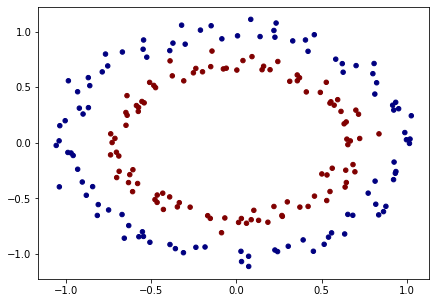

In [12]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=200, noise=0.05, factor=0.7)

# visualize in 2D
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

# Model definition

In [ ]:
from src.yaae.engine import Node
from src.yaae.nn import NN, Optimizer

In [ ]:
model = NN(nin=2, nouts=[16,16,1])
print(model)
optimizer = Optimizer(params=model.parameters(), lr=0.001)

In [5]:
def cross_entropy_loss(y_pred, y):
    # 1. Compute cross entropy loss.
    train_loss = -y + y_pred.exp().sum(axis=0, keepdims=False).log()
    train_loss = train_loss.sum(axis=0, keepdims=False) / len(train_loss)

    # 2. Compute training accuracy.
    train_acc = [(yi > 0) == (y_predi > 0)  for yi, y_predi in zip(y, y_pred.data[..., 0])]
    train_acc = np.sum(train_acc) / len(train_acc)

    return train_loss, train_acc

In [10]:
EPOCHS = 100

inputs = Node(X, requires_grad=False)

for epoch in range(EPOCHS):

    optimizer.zero_grad()
    # Forward pass.
    y_pred = model(inputs)
    train_loss, train_acc = cross_entropy_loss(y_pred, y)
    print(train_loss.shape)
    print(train_loss)
    # Backward pass.
    train_loss.backward()

    # Parameters update.
    optimizer.step(lr=LR)

    print(f"Epoch {epoch}: train-loss: {train_loss} | train-acc: {train_acc}")

(1,)
Node(data=[4.8058163],
 grad=Node(data=[0.],
 grad=None)
)



ValueError: non-broadcastable output operand with shape (1,) doesn't match the broadcast shape (2,)